<div dir="rtl" style="font-size:18px;">
ساخت مدل QSAR برای مهارکننده‌های ویروس کرونا
</div>


<div dir="rtl" style="font-size:18px;">
خواندن داده‌ها
</div>


In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('../csv/bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.142668
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.026872
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.869666
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.882397
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.675718
82,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.644548
83,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.412289
84,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.841638


In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
82,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
83,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
84,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0     5.142668
1     5.026872
2     4.869666
3     4.882397
4     5.698970
        ...   
81    4.675718
82    3.644548
83    4.412289
84    4.841638
85    4.675718
Name: pIC50, Length: 86, dtype: float64

<div dir="rtl" style="font-size:18px;">
حذف ویژگی‌های با واریانس پایین
</div>


In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP34,PubchemFP37,...,PubchemFP710,PubchemFP712,PubchemFP716,PubchemFP734,PubchemFP758,PubchemFP776,PubchemFP779,PubchemFP797,PubchemFP818,PubchemFP821
0,0,0,1,1,0,0,0,0,0,0,...,1,0,1,1,1,0,1,1,0,1
1,0,0,1,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0,1,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,1,1,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,0,0,0,1,0,0,0,0,...,1,1,0,1,0,1,0,1,1,0
82,1,1,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,1,1,0
83,0,1,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,1,1,0
84,0,1,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,1,1,0


In [6]:
X.to_csv('descriptor_list.csv', index = False)

<div dir="rtl" style="font-size:18px;">
مدل رگرسیون جنگل تصادفی
</div>


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.9482543457410593

<div dir="rtl" style="font-size:18px;">
پیش‌بینی مدل
</div>


In [9]:
Y_pred = model.predict(X)
Y_pred

array([4.89533836, 4.93333938, 4.97677508, 5.24243661, 5.53747924,
       5.6967413 , 5.30914953, 5.24243661, 5.02705763, 5.24243661,
       4.92686126, 4.82524497, 4.36951463, 4.28858457, 4.32319342,
       6.10452655, 4.99004243, 4.6187818 , 4.6187818 , 4.34796932,
       5.7619534 , 4.49640521, 5.30678206, 3.74545419, 3.76970539,
       3.94761547, 4.03381472, 4.20250887, 4.16645999, 4.45705439,
       4.93952019, 4.91107378, 4.92178052, 3.3160025 , 3.78833502,
       3.66334068, 3.58943286, 3.62488553, 3.75688064, 3.91925366,
       3.69469359, 4.11453451, 3.8137686 , 4.19051245, 4.33450081,
       4.12235519, 4.93952019, 4.85964257, 4.92178052, 4.96097622,
       5.61697892, 5.01176846, 5.16074716, 4.87521739, 4.87881567,
       4.9307731 , 4.7058722 , 4.94769036, 4.85839428, 4.76709786,
       4.57528105, 5.25652964, 5.27778506, 4.93022846, 4.84448773,
       4.78056388, 4.79708133, 4.80532718, 4.78185974, 4.5647202 ,
       5.90347938, 7.12934119, 7.06875076, 6.40373104, 6.55994

<div dir="rtl" style="font-size:18px;">
عملکرد مدل
</div>


In [10]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.05
Coefficient of determination (R^2): 0.95


<div dir="rtl" style="font-size:18px;">
مصورسازی داده‌ها (مقادیر آزمایشی در مقابل مقادیر پیش‌بینی‌شده pIC50 برای داده‌های آموزشی)
</div>


In [11]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

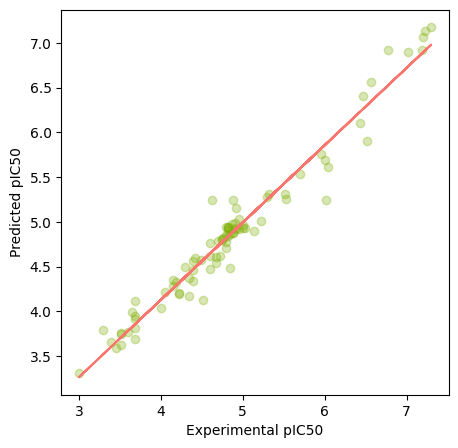

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)



z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

<div dir="rtl" style="font-size:18px;">
ذخیره مدل به عنوان شیء Pickle
</div>


In [13]:
import pickle

In [14]:
pickle.dump(model, open('Coronavirus_model.pkl', 'wb'))